In [1]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [2]:
iris = pd.read_csv('iris-data.csv')

# first we take a look at the data to see what it looks like
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.100,3.5,1.4,0.2,Iris-setosa
1,4.900,3.0,1.4,0.2,Iris-setosa
2,4.700,3.2,1.3,0.2,Iris-setosa
3,4.600,3.1,1.5,0.2,Iris-setosa
4,5.000,3.6,1.4,0.2,Iris-setosa
5,5.400,3.9,1.7,0.4,Iris-setosa
6,4.600,3.4,1.4,0.3,Iris-setosa
7,5.000,3.4,1.5,NaN,Iris-setosa
8,4.400,2.9,1.4,NaN,Iris-setosa
9,4.900,3.1,1.5,NaN,Iris-setosa


In [3]:
# we check how many nulls we have on each column
iris.isna().sum()


sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [9]:
# we check the datatypes of our dataframe to make sure everything has the correct format.
iris.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
class               object
dtype: object

In [10]:
# we look at the general descriptive statistics, where we notice that we might have some extremely low values on the sepal length column.
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm
count,150.000000,150.000000,150.000000
mean,5.644627,3.054667,3.758667
std,1.312781,0.433123,1.764420
min,0.055000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.700000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


In [4]:
# we check how many classes we have, since there's only one column with non-numerical data. We identify duplicates.
iris['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [5]:
# dropping the columns with null values, since substituting these with the mean wouldn't add much to our dataframe.
iris.dropna(axis=1, inplace=True)
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,class
0,5.100,3.5,1.4,Iris-setosa
1,4.900,3.0,1.4,Iris-setosa
2,4.700,3.2,1.3,Iris-setosa
3,4.600,3.1,1.5,Iris-setosa
4,5.000,3.6,1.4,Iris-setosa
5,5.400,3.9,1.7,Iris-setosa
6,4.600,3.4,1.4,Iris-setosa
7,5.000,3.4,1.5,Iris-setosa
8,4.400,2.9,1.4,Iris-setosa
9,4.900,3.1,1.5,Iris-setosa


In [11]:
# we correct the duplicate classes 
iris.loc[iris['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'
iris.loc[iris['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris

,sepal_length_cm,sepal_width_cm,petal_length_cm,class
0,5.100,3.5,1.4,Iris-setosa
1,4.900,3.0,1.4,Iris-setosa
2,4.700,3.2,1.3,Iris-setosa
3,4.600,3.1,1.5,Iris-setosa
4,5.000,3.6,1.4,Iris-setosa
5,5.400,3.9,1.7,Iris-setosa
6,4.600,3.4,1.4,Iris-setosa
7,5.000,3.4,1.5,Iris-setosa
8,4.400,2.9,1.4,Iris-setosa
9,4.900,3.1,1.5,Iris-setosa


In [12]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
# we delete the incorrect values (0.005)
iris = iris.drop(iris[iris.sepal_length_cm < 1].index)

In [14]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm
count,145.000000,145.000000,145.000000
mean,5.837241,3.068276,3.746897
std,0.813936,0.431680,1.790564
min,4.400000,2.000000,1.000000
25%,5.100000,2.800000,1.500000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


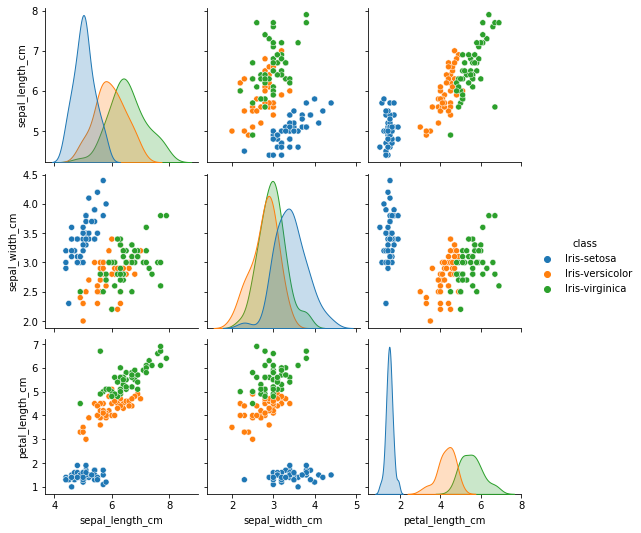

In [15]:
import seaborn as sns
import matplotlib as plt

sns.pairplot(iris, hue = 'class')